In [1]:
import networkx as nx
import matplotlib as plt
import numpy as np
import pandas as pd

In [2]:
def zero_runs(a):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges      

def pathBand(path):
    path_len=len(path)
    #print(path)
    #print(path[0][0])
    resource=Resource[path[0][0]][path[0][1]][path[0][2]]
    for i in range(1,path_len):
        resource=list(map(lambda x: x[0]+x[1], zip(resource, Resource[path[i][0]][path[i][1]][path[i][2]])))
    pathbandList=zero_runs(resource) 
    
    return pathbandList

In [3]:
def pathBand_Ocuupy(loc1,loc2,wave1,band,index):
    path=SD_pathLink[loc1][loc2]
    pathBand=ALL_SD_bandwidth[loc1][loc2]
    for i in range(len(path)):
        for j in range(band):
            #print(path)
            #print(wave1)
            #print(Resource[path[i][0]][path[i][1]][path[i][2]][wave1+j])
            Resource[path[i][0]][path[i][1]][path[i][2]][wave1+j]+=index+1
            
    return

        
def pathUpdate():
    SR_bandwidth=[]
    #MaxBand=[]
    Hops=[]
    for i in range(len(SD_pathLink)):
        band=[]
        #Max=[]
        hops=[]        
        for j in range(len(SD_pathLink[i])):
            #cost.append(pathCost(SD_pathLink[i][j]))
            hops.append(len(SD_pathLink[i][j]))
            b=pathBand(SD_pathLink[i][j])
            #Max.append(max(b[:,1] - b[:,0]))
            band.append(b)            
        #SR_pathLink_cost.append(cost)
        SR_bandwidth.append(band)
        #MaxBand.append(Max)
        Hops.append(hops)
    global ALL_SD_bandwidth
    ALL_SD_bandwidth=SR_bandwidth
        
    return

In [4]:
def CoreSetup():
    Nodes_list=list(G.nodes)
    #Link_bypass=[]
    for i in Nodes_list:
        neighborList=list(G.neighbors(i))
        #bypasscore_num=len(neighborList)-1# set the bypass core number within each fiber 
        for j in range(len(neighborList)):
            dis=1
            while(j+dis<len(neighborList)):
                input_loc=edges_list.index((neighborList[j],i))
                output_loc=edges_list.index((i,neighborList[j+dis]))
                successFlag=0
                for m in range(7):
                    if(len(bypassEdges[input_loc][m])==0):
                        for n in range(7):
                            if(len(bypassEdges[output_loc][n])==0):
                                bypassEdges[output_loc][n].append(((neighborList[j],i,m)))
                                bypassEdges[input_loc][m].append(((i,neighborList[j+dis],n)))
                                successFlag=1
                                break
                        if(successFlag==1):
                            break
                input_loc=edges_list.index((neighborList[j+dis],i))
                output_loc=edges_list.index((i,neighborList[j]))
                successFlag=0
                for m in range(7):
                    if(len(bypassEdges[input_loc][m])==0):
                        for n in range(7):
                            if(len(bypassEdges[output_loc][n])==0):
                                bypassEdges[output_loc][n].append(((neighborList[j+dis],i,m)))
                                bypassEdges[input_loc][m].append(((i,neighborList[j],n)))
                                successFlag=1
                                break
                        if(successFlag==1):
                            break
                                                                                                        
                dis+=1
    return;

In [5]:
def bypassType(path):
    path_len=len(path)
    if(path_len==1):
        bypass_type=0
    elif(path_len==2):
        edgeLoc0=edges_list.index((path[0][0],path[0][1]))
        edgeLoc1=edges_list.index((path[1][0],path[1][1]))
        if(path[1] in Out_bypassEdges[edgeLoc0][path[0][2]] and path[0] in In_bypassEdges[edgeLoc1][path[1][2]] ) :
            bypass_type=2
        else:
            bypass_type=0
            
    elif(path_len==3):       
        edgeLoc0=edges_list.index((path[0][0],path[0][1]))
        edgeLoc1=edges_list.index((path[1][0],path[1][1]))
        edgeLoc2=edges_list.index((path[2][0],path[2][1]))
        if(path[1] in Out_bypassEdges[edgeLoc0][path[0][2]] and path[0] in In_bypassEdges[edgeLoc1][path[1][2]] ) :
            bypass_type=1
        elif(path[2] in Out_bypassEdges[edgeLoc0][path[1][2]] and path[1] in In_bypassEdges[edgeLoc1][path[2][2]] ):
            bypass_type=1
        else:
            bypass_type=0
                       
            
    return bypass_type
                
            

In [6]:
def bypassType(path):
    path_len=len(path)
    if(path_len==1):
        bypass_type=0
    elif(path_len==2):
        edgeLoc0=edges_list.index((path[0][0],path[0][1]))
        edgeLoc1=edges_list.index((path[1][0],path[1][1]))
        if(path[1] in Out_bypassEdges[edgeLoc0][path[0][2]] and path[0] in In_bypassEdges[edgeLoc1][path[1][2]] ) :
            bypass_type=2
        else:
            bypass_type=0
            
    elif(path_len==3):       
        edgeLoc0=edges_list.index((path[0][0],path[0][1]))
        edgeLoc1=edges_list.index((path[1][0],path[1][1]))
        edgeLoc2=edges_list.index((path[2][0],path[2][1]))
        if(path[1] in Out_bypassEdges[edgeLoc0][path[0][2]] and path[0] in In_bypassEdges[edgeLoc1][path[1][2]] ) :
            bypass_type=1
        elif(path[2] in Out_bypassEdges[edgeLoc0][path[1][2]] and path[1] in In_bypassEdges[edgeLoc1][path[2][2]] ):
            bypass_type=1
        else:
            bypass_type=0
                       
            
    return bypass_type
                
            
            
    

In [7]:

def randomWave(wavelist):
    random_seed=np.random.randint(len(wavelist))
    return wavelist[random_seed]


In [29]:
def PathAlgorithm_1(PathList,hopsList,bandwidth,pathBandList,bypassList,wave):
    Max=np.zeros(len(pathBandList))
    Sum=np.zeros(len(pathBandList))
    for i in range(len(pathBandList)):
        #print (pathBandList[i][:,1] - pathBandList[i][:,0])
        #print(i)
        #print(PathList[0])
        Max[i]=max(pathBandList[i][:,1] - pathBandList[i][:,0])
        Sum[i]=sum(pathBandList[i][:,1] - pathBandList[i][:,0])
    
    infor={"place":range(len(PathList)),
           "bypass":bypassList,
           "bandwidth": Max,
           "hops": hopsList,
           "sum":Sum
         }
    
    Path_infor=pd.DataFrame(infor)     
    #print(Path_infor)
    df=Path_infor.sort_values(by=["hops",'sum'],ascending=[True,False]) 
    df.reset_index(drop=True, inplace=True)#reset the index sequence
    Path=[]
    successful_flag=0
    for i in range(len(df)):
        if(df["bandwidth"][i]>bandwidth):
            for j in pathBandList[df["place"][i]]:
                if(wave>=j[0] and wave+bandwidth<=j[1]):
                    Path=PathList[df["place"][i]]
                    traffic_feedback.append(df["bypass"][i])
                    successful_flag=1
                    break 
        if(successful_flag==1):
            break
    if(len(Path)==0):
        traffic_feedback.append(-1)
        #print(df)
    return Path

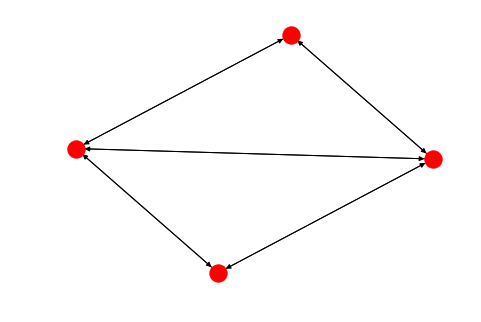

In [30]:
def edgeToLinks(path):
    pathlist=[]
    path_len=len(path)
    corePossib=7**path_len
    for i in range(corePossib):
        List=[]
        List.append((path[0]+(i%7,)))

        for j in range(1,path_len):
            List.append((path[j]+(int((i/(7**j)%7)),)))
        if(len(List)>0):
            pathlist.append(List)    
    return pathlist



TrafficCost=0
node_list=[0,1,2,3]
SR_pair=[(0,1),(1,0),(1,2),(2,1),(0,2),(2,0),(2,3),(3,2),(0,3),(3,0),(1,3),(3,1)]
edges_list=[(0,1),(1,0),(1,2),(2,1),(0,2),(2,0),(2,3),(3,2),(1,3),(3,1)]
bypassEdges=[]
In_bypassEdges=[]
Out_bypassEdges=[]
for i in range(len(edges_list)):
    BY=[]
    BY0=[]
    BY1=[]
    
    for j in range(7):
        BY.append([])
        BY0.append([])
        BY1.append([])
    bypassEdges.append(BY)
    In_bypassEdges.append(BY0)
    Out_bypassEdges.append(BY1)
    

   
#先对D=2的节点进行bypass设置，在对D=3的节点进行bypass设置
#每次设置都在该link中不存在

G=nx.DiGraph()
G.add_nodes_from(node_list)
G.add_edges_from(edges_list)
nx.draw(G)

#plt.show()


link_list=[] 

for k in range(len(edges_list)):
    link_list0=[]
    for i in range(7):
        link_list0.append(edges_list[k]+(i,)) 
    link_list.append(link_list0)

SD_path=[]
SR_pathLink=[]
for i in range(len(SR_pair)):
    path0=[]
    for path in nx.all_simple_paths(G, source=SR_pair[i][0], target=SR_pair[i][1]):
        path_edges=[]            
        for j in range(len(path)-1):
            path_edges.append((path[j],path[j+1]))
        path0.append(path_edges)
    SD_path.append(path0)


#CoreSetup() 
for i in range(len(bypassEdges)):
    Link=bypassEdges[i]
    for j in range(7):
        if(len(Link[j])>0):
            if(Link[j][0][0]==edges_list[i][1]):
                
                Out_bypassEdges[i][j]=Link[j]
            elif(Link[j][0][1]==edges_list[i][0]):
                In_bypassEdges[i][j]=Link[j]

In [31]:
SD_pathLink=[]  
for i in range(len(SD_path)):
    Links=[]
    for j in range(len(SD_path[i])):
        Links=Links+edgeToLinks(SD_path[i][j])
        
    SD_pathLink.append(Links)

In [32]:
Total_bandwidth=161
Resource=np.zeros([4,4,7,161]).tolist()
ALL_SD_bandwidth=[]
MaxBand=[]
Hops=[]
Bypass_Type=[]
for i in range(len(SD_pathLink)):
    Band=[]
    Max=[]
    Hhops=[]
    Bypass=[]
    for j in range(len(SD_pathLink[i])):
        Hhops.append(len(SD_pathLink[i][j]))
        b=pathBand(SD_pathLink[i][j])
        Max.append(max(b[:,1] - b[:,0]))
        Band.append(b)
        Bypass.append(bypassType(SD_pathLink[i][j]))
    ALL_SD_bandwidth.append(Band)
    MaxBand.append(Max)
    Hops.append(Hhops)
    Bypass_Type.append(Bypass)
    

In [33]:
Traffic=pd.read_csv('traffic.csv',sep=',',names=['S','D','band'])
SuccessFlag=np.zeros(len(Traffic))
traffic_wave=[]
traffic_path=[]
traffic_feedback=[]
Traffic_num=len(Traffic)
for i in range(Traffic_num):
    traffic=(Traffic['S'][i],Traffic['D'][i])
    band=Traffic['band'][i]
    traffic_Path=SD_pathLink[SR_pair.index(traffic)]
    traffic_Hops=Hops[SR_pair.index(traffic)]
    traffic_Band=ALL_SD_bandwidth[SR_pair.index(traffic)]
    traffic_Bypass=Bypass_Type[SR_pair.index(traffic)]
    wave=list(range(Total_bandwidth-1))
    while(len(wave)):
        PathFlag=0
        select_wave=randomWave(wave)
        print(select_wave)
        selectPath=PathAlgorithm_1(traffic_Path,traffic_Hops,band,traffic_Band,traffic_Bypass,select_wave)
        if(len(selectPath) and select_wave+band<=160):
            Pathloc=traffic_Path.index(selectPath)
            pathBand_Ocuupy(SR_pair.index(traffic),Pathloc,select_wave,band,i)
            PathFlag=1
            traffic_wave.append(select_wave)
            traffic_path.append(selectPath)
            pathUpdate()
            break
        else:
            wave.remove(select_wave)
    
    if(PathFlag==1):
        SuccessFlag[i]=1
        
print(SuccessFlag) 

56
24
124
117
50
55
159
36
112
63
139
140
7
111
57
115
113
40
3
139
110
153
119
14
79
12
78
117
111
86
101
120
16
59
75
0
159
151
134
157
142
112
126
63
101
91
6
7
12
115
151
18
50
30
61
44
39
158
113
80
19
1
24
89
143
144
140
113
138
121
74
35
134
88
155
141
85
72
103
91
5
82
44
111
80
96
99
74
83
92
38
120
153
80
18
99
0
155
64
147
123
54
77
101
43
78
14
93
5
96
129
84
23
102
154
91
98
68
47
126
115
76
156
50
134
30
103
135
52
98
156
23
135
140
25
100
108
84
47
157
82
18
114
144
106
24
129
41
150
8
123
104
130
45
149
109
107
147
129
104
59
159
134
7
38
69
96
16
155
91
3
118
106
126
118
129
157
99
96
82
100
79
43
156
44
112
137
91
103
76
1
91
92
94
127
56
110
139
132
8
106
90
15
60
159
107
67
23
149
73
58
15
105
16
149
76
71
30
114
21
104
40
43
118
104
80
138
54
3
22
141
46
101
61
61
154
106
116
46
144
2
159
139
68
155
24
31
130
142
73
120
117
52
107
8
73
34
61
67
106
23
148
153
24
8
86
61
52
53
85
34
134
81
123
133
8
118
33
13
110
89
37
52
77
98
87
52
123
89
99
82
1
83
47
95
35
82
15

140
147
135
80
86
24
57
35
111
85
88
23
46
115
34
66
63
20
5
125
40
132
36
106
142
148
76
48
39
6
116
92
114
109
7
18
94
69
141
49
11
50
29
119
112
1
73
52
105
98
78
99
157
149
19
133
134
87
44
129
104
32
55
28
139
100
144
54
121
67
136
27
4
0
124
120
25
107
74
108
146
101
152
41
89
90
68
37
2
38
12
62
123
45
158
13
51
30
151
79
91
22
33
145
155
16
122
31
96
59
118
43
61
102
126
117
64
154
10
71
60
70
137
3
53
138
83
153
75
93
21
103
77
127
17
72
8
159
128
81
30
152
103
34
145
35
130
100
50
92
129
33
79
117
98
72
147
61
65
77
102
110
35
52
1
9
73
118
121
74
140
40
2
83
103
42
94
138
141
152
23
80
7
146
70
137
16
30
69
131
92
26
101
3
46
34
22
90
99
53
43
157
59
60
48
135
21
158
15
93
125
100
24
130
106
153
41
128
81
5
98
14
37
56
36
25
44
142
38
76
151
17
91
86
144
39
154
112
96
133
132
107
124
79
10
150
97
31
75
58
109
89
64
143
126
12
0
63
57
18
8
111
104
51
28
68
149
134
29
84
27
159
78
82
105
49
54
20
117
66
13
114
55
11
148
119
113
19
129
116
88
47
32
4
50
45
108
67
139
87
145
62


42
39
2
13
114
53
141
12
122
135
33
30
74
80
46
81
0
57
115
63
129
26
9
48
88
71
51
76
37
92
96
142
140
65
121
23
27
86
73
156
150
61
124
66
99
17
72
8
103
118
149
36
29
147
106
113
82
98
79
101
90
95
116
130
97
159
10
112
111
11
78
83
131
14
67
137
25
127
87
60
132
52
155
139
85
93
117
44
128
148
3
152
151
31
56
89
91
35
21
6
62
41
28
104
102
24
22
59
138
153
94
20
119
110
108
120
136
54
146
105
144
143
19
126
4
18
158
15
75
34
145
49
133
134
126
98
11
3
142
2
123
125
153
6
118
144
56
130
70
16
71
135
87
115
26
111
147
138
51
49
103
9
79
108
53
117
154
81
92
127
44
83
100
50
150
63
80
74
134
113
110
14
68
136
5
58
94
97
137
112
40
25
93
133
159
116
43
52
96
114
107
41
47
65
76
104
84
21
18
42
78
19
10
30
91
121
31
46
88
0
69
27
34
38
1
59
131
24
156
149
35
75
57
148
23
39
29
37
4
151
17
7
109
67
85
152
36
20
140
86
64
62
15
13
73
72
28
60
141
122
124
48
132
95
12
33
139
101
32
143
106
155
129
146
157
82
54
128
90
61
22
105
102
77
8
119
89
120
145
55
99
158
45
66
140
98
17
96
33
120
91

55
7
76
31
104
158
135
116
114
106
1
79
29
112
143
5
65
39
151
90
146
57
131
26
49
34
109
96
94
108
87
10
13
33
44
100
132
128
58
136
4
145
154
137
101
20
80
127
32
111
95
30
16
40
130
63
67
150
124
50
56
48
139
119
22
98
83
62
77
42
24
99
134
37
71
27
152
74
25
159
88
64
23
142
53
110
21
7
116
7
108
23
55
117
99
110
89
104
142
105
98
116
118
84
66
133
59
144
90
102
126
64
106
34
122
8
71
36
39
57
87
2
150
24
114
49
137
47
5
65
15
127
67
128
35
46
147
1
30
103
63
21
96
20
48
113
143
41
86
130
135
9
123
158
79
16
92
139
42
11
153
50
70
3
23
38
131
62
32
100
75
52
145
82
141
129
7
76
151
40
152
88
159
27
121
19
14
146
85
10
28
0
95
55
157
12
101
37
44
4
148
111
22
107
115
155
17
73
109
132
43
138
93
60
58
156
45
51
18
120
149
80
140
119
136
56
112
108
134
78
77
94
125
53
154
91
69
124
97
68
29
6
81
26
25
54
33
74
31
72
61
83
13
109
106
9
142
122
23
130
145
153
112
38
96
148
146
98
143
17
127
59
83
81
111
126
60
103
16
0
29
158
45
52
152
43
82
106
94
155
14
156
34
157
129
116
137
79
54
92

143
123
17
117
50
42
13
112
150
152
98
138
73
2
48
104
58
65
12
66
36
129
151
128
113
80
72
78
29
41
15
126
74
107
8
82
121
63
100
54
23
136
4
131
142
120
44
28
92
90
77
93
52
148
69
18
157
30
91
45
97
21
79
26
158
5
19
130
95
116
134
149
82
71
59
118
121
25
81
106
56
152
101
88
96
123
84
48
42
55
50
30
159
87
52
98
158
79
61
130
11
113
122
156
69
151
49
47
138
63
6
70
36
41
107
139
131
32
95
3
92
115
46
26
35
124
103
29
5
44
99
51
86
45
18
31
67
14
154
54
78
104
93
100
21
62
22
142
20
40
73
125
57
7
109
150
60
136
90
135
77
117
37
97
16
108
146
12
28
126
2
147
27
133
132
24
127
111
10
66
33
8
4
17
68
83
0
145
140
34
85
91
75
155
128
53
144
74
105
94
58
141
137
129
13
19
38
15
110
119
43
64
143
1
9
153
114
39
148
102
112
80
65
72
89
23
157
120
76
77
84
71
11
98
97
141
51
155
87
72
149
37
41
13
27
126
24
48
73
79
20
120
134
71
91
156
61
5
36
82
77
123
121
122
159
135
78
85
92
145
32
52
146
0
14
42
30
50
147
115
19
21
158
96
2
150
142
151
154
129
111
99
148
118
76
108
45
8
15
12
127
49
1

26
113
140
153
120
87
155
66
85
43
130
37
8
4
138
76
135
23
137
47
64
143
73
9
50
107
42
36
154
11
134
105
151
90
47
14
124
148
138
142
66
74
16
152
147
114
50
10
157
22
89
49
23
3
126
37
146
110
67
8
137
108
83
65
26
119
109
13
82
115
9
97
87
140
45
135
34
21
131
48
18
141
86
123
15
144
79
159
120
99
156
59
53
95
31
38
51
46
6
70
80
128
84
150
41
121
33
101
36
75
133
102
7
149
98
139
24
58
4
5
130
1
17
136
63
39
104
118
60
40
93
43
0
85
96
54
57
69
127
91
56
132
92
19
68
107
32
35
61
129
155
143
145
27
28
76
72
29
73
112
12
44
103
88
52
81
2
64
62
111
78
94
55
125
100
20
113
42
106
77
25
122
30
116
158
71
117
153
1
146
94
102
16
13
68
3
89
114
147
135
10
120
80
134
33
151
58
99
50
127
91
126
31
100
104
78
70
0
38
63
96
156
23
44
46
39
34
105
84
124
56
113
136
51
92
110
95
122
64
101
106
14
18
41
25
111
62
59
93
1
118
35
77
7
144
19
155
145
22
24
103
21
125
73
132
26
36
98
131
52
42
140
65
55
148
30
133
72
154
29
2
149
43
137
159
141
87
49
17
119
48
8
53
74
71
67
37
40
108
153
82
27
12

23
7
155
81
133
2
30
144
145
23
151
28
64
107
20
99
82
42
46
87
94
12
159
110
153
127
8
71
122
21
77
158
101
65
72
69
84
90
37
115
26
45
54
53
40
11
67
98
130
123
75
88
83
13
70
106
131
55
24
91
113
125
97
5
152
146
22
43
48
124
138
57
154
47
61
50
58
150
79
3
16
34
4
137
15
135
100
143
18
9
49
7
86
0
111
117
19
6
148
60
120
132
104
31
140
44
32
85
116
139
35
36
136
68
134
96
78
52
33
80
119
29
62
121
74
14
126
103
27
25
92
93
10
59
157
112
17
56
63
105
41
147
156
73
155
142
89
118
108
51
109
149
129
114
38
1
66
102
76
128
141
95
39
127
120
64
76
116
63
146
53
104
42
154
144
11
83
18
151
117
19
30
99
101
152
102
143
66
16
34
85
100
37
1
90
129
10
26
7
130
105
92
121
74
77
133
111
6
86
142
98
89
148
69
14
39
138
158
68
35
43
73
28
67
52
71
94
55
124
44
128
29
107
122
65
108
9
137
159
38
17
45
88
115
155
40
41
47
50
125
126
36
20
25
119
54
81
132
135
131
22
149
84
24
48
4
145
33
27
23
109
110
114
78
95
118
139
82
31
61
141
70
113
46
112
59
49
134
96
75
93
153
21
140
62
80
3
58
103
136
91

83
85
33
6
133
113
57
159
64
152
122
127
104
130
20
32
143
145
87
41
11
95
66
81
77
118
29
126
16
125
56
71
144
1
34
67
83
4
53
89
135
139
47
44
128
40
3
76
134
18
62
35
116
108
148
28
50
157
121
151
150
90
114
102
117
137
8
54
38
111
146
14
25
26
70
93
101
123
106
59
110
142
74
132
82
27
80
91
119
43
2
100
17
23
36
85
86
5
60
9
155
65
156
105
49
7
24
96
73
103
75
51
48
94
63
147
22
107
46
68
58
120
99
10
84
112
149
55
30
115
153
92
98
72
158
97
69
31
141
37
12
42
61
140
21
109
136
45
39
19
78
131
15
13
138
88
52
154
79
129
124
0
77
96
111
159
93
30
43
144
11
15
87
107
120
58
47
126
140
99
25
116
17
45
131
81
89
62
113
80
93
28
48
155
137
103
23
130
95
67
63
38
29
84
106
76
12
97
31
60
104
30
98
36
123
124
158
82
146
10
41
35
22
59
27
115
143
112
13
145
86
142
75
101
37
57
19
78
111
64
54
108
65
26
90
134
129
122
5
109
118
119
9
3
49
32
51
69
138
150
70
154
94
156
125
148
71
44
105
110
72
50
96
53
2
128
33
157
14
88
73
114
149
159
66
133
7
18
55
83
91
121
52
85
21
127
61
42
135
8
74
79

55
124
52
97
36
75
109
147
144
141
153
81
85
34
106
26
123
159
79
150
9
116
99
46
49
130
109
1
19
28
44
60
62
125
39
124
27
133
3
74
12
84
53
115
142
6
2
132
97
110
157
118
131
106
54
137
26
108
77
76
138
86
25
153
93
109
144
146
94
47
145
130
90
111
154
66
98
64
57
55
151
67
82
40
116
152
122
159
129
135
73
7
102
78
96
143
128
8
31
92
72
15
156
107
24
20
95
56
113
38
105
42
43
81
30
150
112
59
91
4
0
29
69
48
101
36
75
79
21
126
114
45
139
89
119
13
63
49
34
71
83
17
35
14
41
140
104
149
65
11
121
58
61
18
32
88
99
120
9
70
123
22
155
148
100
46
117
87
85
50
80
134
16
52
23
68
136
141
127
158
33
103
147
5
51
37
10
103
153
89
132
8
91
142
119
126
77
83
135
46
11
33
2
88
71
137
127
103
25
16
26
38
6
153
119
95
109
111
143
31
115
10
114
20
5
41
63
58
34
64
0
140
110
9
67
7
131
81
59
157
84
117
105
156
134
150
85
65
76
4
30
62
126
44
113
100
40
106
52
149
101
45
146
129
21
124
112
43
39
1
138
17
136
128
50
132
122
80
142
141
15
92
96
8
32
42
120
73
90
60
29
14
107
94
37
79
147
154
116
74


99
154
81
79
10
58
127
116
87
132
1
97
37
24
55
92
142
121
41
49
75
50
11
112
141
114
144
63
113
136
126
109
25
135
18
26
78
105
153
22
82
104
68
102
145
53
66
95
83
120
101
14
93
61
74
118
19
106
59
43
67
76
100
134
60
111
4
15
150
156
155
71
6
69
150
98
53
139
15
154
145
104
0
106
141
43
124
14
66
26
93
61
148
143
64
81
26
40
22
51
81
37
147
52
111
157
7
57
44
11
10
55
62
153
2
123
3
151
35
110
159
8
61
126
70
34
32
76
131
127
139
77
15
158
6
135
133
39
63
75
130
86
155
100
25
14
113
26
19
60
117
128
24
47
53
142
48
114
89
109
138
150
68
58
144
49
73
88
59
96
79
156
33
38
118
107
108
143
36
136
1
92
129
120
45
43
21
105
103
65
145
154
93
115
28
0
124
99
9
69
90
152
12
74
66
125
82
149
87
41
18
98
23
56
5
46
102
30
106
78
134
101
148
80
16
84
85
64
140
42
4
54
146
27
20
121
50
95
94
67
72
104
40
119
97
137
91
31
71
17
83
116
122
13
112
141
132
29
18
28
67
84
24
35
87
108
27
99
42
147
20
118
110
62
9
95
61
75
52
134
33
148
74
111
139
114
83
15
39
157
90
152
104
76
138
135
106
9
75
146


158
72
60
6
43
106
150
85
46
114
112
111
128
75
147
54
15
123
105
10
32
87
81
127
154
7
74
38
119
61
140
50
109
20
89
26
48
144
45
39
145
116
66
35
100
70
12
18
156
22
31
90
65
27
53
137
118
151
57
98
132
143
101
28
67
16
19
68
79
124
21
139
59
86
69
78
8
9
73
107
121
71
97
82
25
5
36
155
56
148
4
149
122
52
108
153
93
95
117
49
96
23
80
113
3
142
84
63
42
34
104
129
159
41
77
0
126
133
125
131
88
99
110
146
157
11
103
40
13
92
17
141
1
55
135
29
30
2
8
4
5
114
0
23
44
46
77
34
51
68
117
139
155
93
96
25
87
21
97
118
90
99
53
16
127
156
113
6
32
49
22
86
84
112
12
55
43
106
47
7
29
159
76
41
116
146
30
142
52
38
107
58
141
2
128
79
135
28
60
122
88
62
63
57
95
92
100
94
26
110
45
153
27
42
132
101
1
19
20
9
67
105
15
157
33
134
137
115
126
102
73
56
158
31
149
111
39
80
81
109
148
91
104
13
64
65
150
129
151
103
36
152
35
85
83
145
123
98
10
143
54
140
124
66
18
144
74
147
75
59
3
50
24
119
14
11
71
136
61
48
72
78
70
130
133
138
121
69
120
17
40
37
125
131
154
108
89
82
59
44
82
57
60

61
56
149
129
122
158
124
89
135
98
26
141
65
35
85
28
153
151
15
14
87
130
114
75
27
101
123
115
139
19
157
34
94
57
79
52
69
131
100
44
72
145
77
95
53
133
43
2
76
71
62
84
154
125
0
128
113
42
30
140
86
25
9
47
93
121
6
10
91
150
119
59
120
81
74
132
118
80
38
55
99
97
31
64
13
49
68
159
7
50
11
152
66
116
12
78
126
1
35
66
24
68
38
126
40
64
2
142
56
146
93
76
65
133
33
82
6
87
118
156
136
129
125
31
96
92
144
62
150
158
149
101
14
105
103
81
91
50
95
137
44
153
157
54
34
94
41
145
22
121
12
143
1
17
26
77
29
57
90
16
113
60
104
8
85
49
88
106
47
72
0
70
122
134
140
116
83
19
42
108
97
48
71
61
102
79
138
58
130
110
114
115
80
37
32
43
107
128
139
63
86
59
117
36
75
3
78
112
67
39
98
127
18
46
13
9
155
151
20
119
5
99
124
4
21
51
159
7
132
52
100
73
111
147
53
109
135
154
148
30
10
74
131
123
141
84
69
15
152
23
55
27
120
45
11
89
28
25
70
1
18
96
12
65
158
112
127
136
80
101
57
45
26
107
85
135
132
103
147
23
74
141
3
155
89
68
117
88
36
53
79
30
71
143
59
123
8
42
24
133
106
78
9

108
21
96
87
43
116
126
66
154
48
64
145
157
86
58
83
28
29
61
113
78
105
132
106
30
80
137
115
26
121
109
36
83
139
123
25
129
55
13
112
156
72
108
7
26
57
0
40
34
80
59
33
20
143
147
48
131
73
23
89
120
102
70
125
116
8
145
54
122
153
128
52
115
39
150
109
21
142
93
49
35
1
45
88
15
38
151
22
4
96
99
119
63
75
64
12
66
3
24
11
94
50
37
51
100
32
14
101
118
60
127
41
29
121
42
27
77
16
113
146
46
92
83
97
104
114
117
5
137
17
124
58
61
148
86
71
95
111
110
159
84
154
81
132
149
74
158
44
31
152
141
30
67
53
136
43
106
62
85
140
69
65
98
103
36
133
9
78
6
130
90
2
87
157
134
126
79
138
10
19
68
135
155
47
91
82
18
76
28
144
105
107
56
159
51
121
92
64
131
18
16
99
52
69
50
71
5
60
4
151
86
107
83
23
36
48
87
9
158
88
146
77
22
34
118
93
94
57
42
21
27
15
81
97
26
17
110
82
41
31
11
8
134
128
28
73
44
54
75
143
63
72
98
91
96
1
20
154
100
120
135
76
78
132
104
70
106
129
85
29
155
14
156
30
124
25
112
152
45
123
58
80
136
90
74
127
148
66
68
12
153
138
114
108
113
61
102
39
149
109
6
11

59
28
108
17
89
11
102
94
129
112
121
116
100
11
2
130
37
99
115
29
96
30
46
79
68
119
38
48
45
39
86
57
56
113
1
109
111
90
95
61
132
153
118
73
53
78
98
44
145
42
131
51
141
84
144
69
74
81
22
66
83
122
158
124
65
71
0
110
138
75
41
156
35
133
149
8
16
67
87
43
7
33
134
36
3
32
4
76
121
152
40
104
150
92
126
47
80
94
54
50
125
55
123
6
15
154
137
64
127
146
5
21
63
116
151
9
26
120
139
13
129
85
49
60
108
52
25
102
27
31
72
12
114
148
59
62
58
93
101
17
28
128
34
112
143
103
10
106
105
70
157
88
117
155
135
20
140
82
24
89
19
147
142
18
91
159
77
107
136
97
14
23
100
107
98
7
133
41
10
152
8
85
141
65
120
144
2
48
14
32
66
22
158
97
148
34
108
31
136
150
26
35
29
79
77
63
109
57
89
90
73
78
23
42
70
5
157
38
151
95
139
44
12
115
137
88
130
125
114
60
128
155
119
123
146
76
87
18
16
84
45
124
75
59
40
92
24
20
113
51
21
110
54
39
131
102
37
69
111
159
83
143
126
46
67
86
132
134
55
135
1
117
28
43
33
116
11
140
127
13
82
30
47
53
96
0
9
3
100
156
98
19
99
50
80
93
91
104
154
153
25
17

96
150
132
153
58
133
14
12
13
110
146
148
135
22
81
141
89
76
124
159
117
36
109
143
54
53
127
100
57
75
138
46
30
19
92
151
62
135
25
111
126
106
20
158
55
103
31
28
119
155
57
94
63
146
102
127
4
66
34
83
8
133
98
93
120
71
112
16
123
35
141
114
0
88
62
139
101
61
11
56
124
159
116
9
26
47
91
2
37
77
147
136
44
70
5
84
60
157
23
46
72
51
82
54
59
107
25
3
117
97
67
65
138
58
7
39
68
156
89
78
134
151
85
14
18
1
64
99
43
29
95
132
130
15
45
17
115
38
30
32
22
129
10
111
152
143
149
81
48
110
100
74
144
125
87
113
80
12
118
128
41
153
75
76
105
140
27
122
50
154
33
131
142
49
104
42
53
40
145
6
79
86
150
24
96
19
13
108
121
36
52
73
92
137
109
148
90
135
69
21
20
131
27
121
116
47
63
149
58
108
79
153
46
123
29
23
56
77
49
41
20
3
124
52
12
147
18
64
44
102
84
151
68
76
19
34
87
148
82
62
21
69
122
92
66
136
32
57
4
59
24
5
11
78
81
139
154
144
104
85
88
155
26
13
146
107
101
130
90
95
141
86
127
14
137
2
112
120
28
43
138
42
114
75
39
126
157
54
51
94
31
125
72
156
9
15
33
8
83
111
4

108
11
51
128
56
14
145
90
29
109
65
50
77
26
142
104
20
93
28
97
76
122
115
140
106
103
92
38
149
124
105
143
88
60
95
157
72
154
74
66
107
44
98
118
91
31
134
138
125
54
57
3
81
21
8
23
159
82
96
42
89
36
4
0
144
48
16
129
100
34
40
152
123
43
86
113
35
116
75
132
153
1
12
5
7
73
99
30
13
33
61
62
155
85
64
39
127
146
53
148
112
131
80
114
120
110
150
52
147
9
6
17
135
45
22
55
49
68
139
130
87
79
32
63
137
83
46
37
81
40
74
99
30
61
124
8
122
134
5
19
86
159
129
21
84
146
102
36
108
57
27
43
45
3
85
77
10
115
133
65
6
23
100
24
145
56
103
1
95
113
94
121
106
71
141
9
123
149
92
132
59
142
70
20
12
16
35
75
42
120
47
54
13
153
96
79
158
83
118
22
55
139
44
127
93
90
147
68
98
63
64
125
7
112
80
155
48
137
53
131
109
29
135
144
15
156
150
89
101
31
51
46
91
34
157
50
32
72
58
88
39
73
152
119
130
38
110
62
87
25
140
14
136
104
138
49
4
18
82
143
52
33
26
105
11
107
66
116
111
151
154
126
2
128
148
117
67
60
0
69
28
17
78
114
97
76
41
37
152
151
132
126
144
153
124
97
28
84
145
130
30


11
41
156
43
150
54
30
79
105
120
102
98
81
100
89
139
108
51
140
6
44
68
67
66
95
27
17
84
123
122
117
65
12
50
153
99
20
32
22
93
42
3
138
52
148
46
157
5
119
28
129
109
96
59
142
55
141
24
37
158
72
103
25
122
85
74
34
149
92
110
142
126
6
61
114
131
87
46
77
144
13
33
75
125
152
29
157
109
65
98
119
107
143
7
37
23
155
153
10
81
20
72
35
137
159
73
66
19
26
78
80
101
39
11
106
86
151
16
141
127
134
112
132
59
95
41
99
158
108
104
113
111
124
22
53
105
63
3
52
14
84
91
36
47
57
94
128
120
135
51
28
62
18
115
38
9
96
67
24
148
88
140
136
32
89
156
79
8
55
133
154
71
42
146
129
58
118
76
40
30
64
49
12
102
1
70
45
138
5
31
145
147
43
69
4
93
150
60
50
17
83
100
48
82
90
21
2
56
97
68
116
44
139
15
54
130
0
27
117
121
123
55
133
159
62
140
12
7
29
125
29
37
113
152
146
32
134
47
50
6
104
63
36
101
57
18
138
142
56
87
106
25
88
73
147
30
141
38
24
23
19
85
77
3
64
26
31
133
22
124
99
1
75
58
84
12
110
45
11
21
15
114
128
82
44
149
117
14
33
139
53
89
107
157
27
109
144
158
155
129
135
1

63
148
26
36
58
109
5
73
12
57
44
106
118
85
7
11
51
37
75
32
146
87
147
121
124
146
143
60
123
43
12
94
48
46
140
130
141
1
110
153
117
126
74
125
115
72
73
28
47
112
53
33
95
108
16
92
0
97
35
128
137
7
20
30
27
90
44
2
17
158
66
38
144
142
3
155
63
70
116
31
98
21
135
127
99
75
136
4
157
101
76
100
25
105
61
56
11
68
65
62
49
69
22
36
8
89
114
134
85
81
18
118
109
106
15
151
132
32
23
133
91
148
71
82
64
83
103
80
145
159
113
67
59
13
37
54
104
29
77
19
150
139
96
88
79
93
41
26
129
45
107
122
102
55
51
40
152
86
42
24
156
154
34
6
57
131
39
120
149
119
111
50
138
52
84
9
78
14
58
5
10
24
62
79
152
52
14
56
139
67
50
13
30
107
118
124
81
3
22
132
42
33
131
106
87
70
80
66
108
91
41
126
127
18
111
100
128
26
61
99
125
69
135
89
5
154
101
54
146
110
68
93
113
116
112
97
25
74
37
104
16
51
53
133
43
23
85
34
94
29
92
21
65
77
12
95
86
35
136
150
115
71
109
7
148
119
10
63
137
27
155
36
121
83
48
8
105
142
9
28
123
78
17
19
59
15
130
2
159
76
72
140
153
129
103
49
88
147
4
11
84
46
157


34
123
81
77
2
129
31
27
29
135
121
47
73
0
9
98
124
40
51
150
43
91
153
22
133
55
87
54
17
4
127
118
75
156
14
107
62
144
103
21
159
63
28
56
84
126
66
103
87
88
105
150
20
154
153
13
56
24
137
8
32
107
54
141
58
84
63
138
93
28
76
39
78
116
95
90
142
53
71
34
48
37
119
91
55
120
99
69
38
22
111
45
44
23
158
159
80
74
143
96
7
85
46
43
124
79
117
21
104
133
114
128
3
27
129
65
67
42
31
47
130
51
121
122
148
136
60
108
25
140
75
98
17
113
155
59
92
139
118
147
89
36
135
126
97
83
19
73
144
16
72
131
2
61
1
94
145
81
5
156
49
125
35
41
101
146
106
68
52
151
29
40
14
9
132
10
77
26
86
70
109
100
102
15
30
110
6
62
149
152
64
127
123
33
4
82
134
157
11
115
18
112
12
50
0
57
91
76
41
134
68
69
142
49
17
130
90
150
64
103
57
123
59
58
141
145
148
48
66
96
21
134
146
90
87
4
133
113
157
47
61
11
85
60
152
55
67
70
22
156
36
77
56
109
15
50
92
71
99
112
51
102
143
121
81
17
135
131
16
150
73
106
7
82
107
88
69
38
149
79
101
24
43
128
46
20
0
158
29
116
1
5
12
42
115
26
80
124
25
53
78
132
32


147
8
41
62
16
86
45
23
123
69
37
18
135
51
140
121
152
61
6
93
16
92
116
9
31
4
50
136
56
139
71
98
44
105
72
13
75
2
24
28
46
20
96
127
68
43
53
27
38
101
107
63
49
143
97
138
42
57
76
74
141
151
35
146
103
124
60
112
21
85
1
71
54
56
130
111
33
19
116
99
91
124
86
122
127
53
141
150
108
16
134
94
8
157
23
17
64
36
15
136
20
62
139
126
61
117
77
143
75
6
112
5
96
32
105
137
103
146
72
71
121
47
79
109
7
97
135
42
88
90
159
25
80
151
148
24
85
1
125
40
2
73
45
93
49
107
48
60
132
114
28
123
102
140
147
153
57
68
65
128
144
26
106
142
152
39
87
44
84
21
104
149
154
59
95
92
46
67
83
63
89
156
82
22
69
27
55
51
58
76
155
81
29
30
41
66
9
74
38
13
3
78
145
119
98
129
133
14
131
18
4
100
37
31
101
11
110
35
120
12
34
138
0
158
50
113
118
115
10
43
52
70
10
72
139
49
140
127
104
33
126
116
134
46
52
130
76
128
119
87
158
59
129
155
45
146
43
33
19
157
47
38
21
118
96
39
132
91
56
84
52
90
98
44
88
134
3
149
111
57
112
17
60
145
70
154
30
109
115
78
16
123
51
147
32
75
14
68
1
127
148
137
5

151
66
110
127
64
38
50
152
135
13
140
56
120
62
52
21
1
36
126
63
86
105
54
49
138
33
46
93
51
8
149
43
57
116
136
108
144
19
5
85
133
2
20
128
111
101
106
72
39
40
124
159
35
122
96
6
10
145
80
71
27
157
109
113
32
115
79
28
134
7
37
48
123
103
41
76
45
90
69
70
146
107
112
61
99
94
141
155
60
87
119
129
117
148
18
0
58
139
26
100
156
3
44
24
73
88
74
42
15
75
150
154
89
104
97
125
137
95
114
153
14
67
55
82
68
23
25
92
98
47
34
29
81
16
147
9
78
31
84
4
83
118
143
130
65
102
151
131
142
132
11
77
30
17
22
121
158
53
91
12
59
74
90
111
28
146
21
104
157
147
25
44
151
78
56
144
97
14
24
109
140
124
32
158
105
94
88
84
128
79
143
41
120
152
122
16
69
48
95
118
23
60
75
30
62
64
37
77
81
138
39
26
7
49
66
17
45
29
73
83
72
71
27
141
40
89
112
54
139
70
57
0
35
1
130
132
115
149
137
6
53
65
47
91
5
43
68
93
86
2
92
142
133
33
80
19
11
150
127
20
85
90
114
55
131
153
34
102
87
12
136
148
52
31
22
129
106
100
46
63
4
135
15
58
8
59
67
18
119
99
50
125
155
121
117
98
13
61
107
116
96
36
154

146
111
148
80
53
127
109
82
153
103
5
86
95
154
52
94
23
134
74
88
144
130
135
6
149
110
101
31
104
159
93
139
32
72
118
24
150
92
13
69
115
37
122
99
126
136
47
140
28
3
46
81
107
78
48
30
119
79
14
8
84
138
40
20
17
85
156
133
96
116
105
44
142
125
65
100
98
132
7
21
27
54
10
26
158
87
33
0
120
97
49
82
85
73
119
81
15
26
56
44
39
5
141
103
114
129
107
96
28
43
84
12
139
102
69
37
120
33
59
151
127
18
0
130
36
158
60
138
74
20
80
128
68
9
7
146
126
77
147
48
23
67
97
134
32
140
105
125
6
122
108
142
116
112
2
92
91
50
58
24
51
119
19
45
155
98
29
52
93
4
150
131
3
61
47
109
113
35
79
82
38
89
49
81
159
133
66
64
63
123
42
154
156
31
88
40
85
54
17
30
71
8
78
157
1
95
86
110
73
15
149
132
101
76
25
75
62
90
153
152
104
136
55
135
13
41
148
144
22
65
10
87
21
115
137
57
16
124
34
94
106
53
111
83
11
145
99
118
143
117
27
70
121
14
72
100
46
29
102
36
75
43
128
2
91
117
32
140
115
82
18
8
81
15
63
90
3
139
19
110
40
134
95
55
29
54
135
64
126
130
36
1
141
86
145
17
119
105
85
49
66
62


12
5
8
139
113
153
62
117
127
158
93
106
133
9
13
40
38
47
21
129
147
68
95
54
87
121
89
96
151
73
159
137
136
120
108
20
62
15
35
125
27
76
36
67
110
1
53
71
59
66
130
22
134
72
43
97
70
131
149
57
124
90
103
14
25
46
65
24
152
158
77
83
99
127
81
143
51
85
50
31
114
75
122
28
98
8
155
142
101
33
117
148
94
2
58
3
104
26
16
10
150
61
56
79
115
39
12
141
29
4
126
153
100
42
119
132
52
112
109
63
145
30
107
69
91
80
118
17
64
49
0
88
123
154
86
11
116
102
105
78
32
82
138
55
41
135
144
74
157
34
23
84
44
19
146
18
45
113
48
140
37
139
156
60
7
111
6
92
128
5
88
55
54
115
133
108
118
127
136
18
139
124
138
112
84
61
147
52
96
4
76
159
145
89
83
150
38
10
41
141
14
121
39
152
149
7
21
100
26
130
1
131
117
15
155
95
34
94
106
70
0
5
11
99
17
8
72
143
3
157
109
68
111
114
45
154
13
16
80
74
33
122
78
28
27
9
103
158
125
86
153
97
151
140
24
105
67
98
56
44
85
32
69
128
73
101
30
12
79
126
92
119
37
142
23
50
29
113
2
35
146
137
48
91
62
43
6
87
60
71
90
66
49
53
88
93
148
102
129
19
64
107


3
104
15
86
118
158
38
20
94
142
96
63
6
32
46
145
92
126
8
66
119
11
155
69
59
83
112
23
55
36
25
39
146
122
95
70
44
12
27
147
91
43
144
101
47
153
111
124
93
125
114
2
54
151
73
56
81
110
17
31
85
87
14
90
71
5
61
123
116
159
16
33
48
64
10
7
137
76
134
136
29
98
100
35
41
50
67
52
121
24
120
1
45
22
4
78
79
72
19
89
42
30
74
102
143
88
113
103
58
140
40
75
157
9
68
62
99
82
117
97
149
156
65
135
37
129
60
53
32
139
98
140
41
68
114
93
69
113
71
147
116
144
117
39
12
43
120
125
86
78
81
49
18
75
72
80
150
36
131
63
7
151
54
102
159
90
108
89
96
84
42
31
9
74
103
59
21
45
56
62
10
51
154
50
11
129
14
52
44
100
156
122
30
17
99
141
110
46
137
136
25
20
95
64
61
155
112
57
60
2
101
132
34
47
16
24
55
66
58
121
142
22
26
94
79
127
126
0
97
123
135
67
107
8
133
28
145
88
77
6
124
85
152
35
158
37
23
111
87
38
153
109
128
40
65
27
105
115
104
83
3
48
70
119
29
106
5
149
73
138
91
4
148
134
92
1
143
118
82
53
76
15
13
130
33
19
157
146
112
156
110
152
98
30
158
70
74
103
134
114
10
66
60
2

27
90
35
13
98
92
143
18
109
119
95
47
141
129
0
146
88
133
10
57
86
20
83
156
5
104
48
59
53
125
115
55
102
82
134
58
154
123
37
78
3
14
111
4
132
103
89
145
40
79
16
70
17
69
28
97
1
9
50
137
66
159
61
34
52
108
76
2
75
67
117
126
101
81
152
150
93
105
54
6
36
106
131
87
33
74
114
12
38
151
19
85
99
11
15
84
112
25
80
142
39
116
158
107
94
23
91
68
113
120
26
31
49
56
155
67
69
5
75
6
58
134
43
14
0
102
53
65
9
47
107
159
103
23
156
86
108
92
90
1
36
131
130
132
118
146
55
49
44
110
120
51
7
71
117
121
48
85
79
24
54
26
112
4
31
78
8
147
155
17
25
94
113
141
30
129
64
111
83
127
29
96
32
140
142
60
35
114
73
72
15
133
157
115
119
10
149
89
122
148
16
52
145
106
105
3
125
101
126
40
21
99
97
139
11
19
82
109
45
81
62
80
88
20
38
66
13
42
143
91
104
70
41
87
28
95
76
84
158
39
150
37
12
137
135
2
77
63
57
50
27
68
152
93
128
151
34
138
59
124
144
116
18
136
153
123
100
33
74
154
56
22
61
98
46
92
91
26
19
61
108
16
59
99
49
102
76
58
144
120
78
128
20
131
57
153
34
80
82
77
17
63
84
79

117
51
134
47
26
127
152
145
157
22
119
60
108
57
110
100
46
25
129
45
33
39
5
68
49
27
105
151
9
8
71
64
143
136
90
44
56
124
82
29
13
43
37
128
3
20
111
159
55
84
1
125
40
156
122
73
123
120
96
112
18
63
140
86
83
21
153
135
30
131
149
115
91
14
61
66
106
75
2
69
138
139
99
107
38
50
59
4
94
133
12
76
126
34
93
103
24
6
11
87
23
74
121
98
85
88
114
113
15
89
141
92
17
65
79
78
109
31
42
118
32
142
137
0
62
148
155
97
31
4
141
75
87
82
120
0
143
34
110
1
63
55
22
153
35
43
15
130
119
97
10
44
132
46
58
52
115
81
24
49
99
106
117
56
79
27
77
158
111
89
101
16
144
54
80
145
102
114
64
122
107
128
13
41
30
48
60
51
134
39
20
23
127
91
67
155
78
53
156
90
73
121
3
96
98
137
18
37
150
33
70
140
9
66
14
139
8
25
124
123
103
152
138
147
29
135
118
76
136
105
86
126
131
61
116
85
154
59
146
108
5
100
125
28
88
113
38
112
45
95
94
57
157
74
104
142
133
40
32
83
148
109
26
62
84
50
149
7
92
129
17
65
151
69
68
12
42
19
11
47
36
71
6
21
2
159
93
72
21
132
125
130
12
112
140
73
54
57
102
157
61
1

In [34]:
a=SuccessFlag.sum()
print(a)

1114.0


In [35]:
print(i)

1499
